In [1]:
'''
1. We get test scores for 2018
2. We get a list of coordinates for Baltimore Schools
3. We count the number of vacant buildings within X miles of each school for 2018
4. We count the difference in vacant buildings from 2017 to 2018 and add that
5. We look at property values for each zip code in the area for that year and add that
6. We count either number of recreation aress or the percentage of greenery.


CREATE predictive SVM to get coefficient weights for each variable



Independent Variables: 
# Vacant Buildings within X miles
% Difference in vacant buildings from last year
# average house price
# recreation facilities within X miles
% area within X miles that is green


Dependent Variables:
# test score
% Enrollment
'''

'\n1. We get test scores for 2018\n2. We get a list of coordinates for Baltimore Schools\n3. We count the number of vacant buildings within X miles of each school for 2018\n4. We count the difference in vacant buildings from 2017 to 2018 and add that\n5. We look at property values for each zip code in the area for that year and add that\n6. We count either number of recreation aress or the percentage of greenery.\n\n\nCREATE predictive SVM to get coefficient weights for each variable\n\n\n\nIndependent Variables: \n# Vacant Buildings within X miles\n% Difference in vacant buildings from last year\n# average house price\n# recreation facilities within X miles\n% area within X miles that is green\n\n\nDependent Variables:\n# test score\n% Enrollment\n'

In [253]:
import pandas as pd
import geopy
import time
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

#import sklearn


In [178]:
def get_coords(df):
    coord = pd.read_excel('/Users/j/Desktop/midterm/db/coordinates.xls')
    
    df = pd.merge(df, coord, how='left',left_on=['School Name'], right_on=['School Name'])
    df = df.drop('Unnamed: 3', 1)
    return df

In [190]:
def create_attendance_master(df, year):


    school_list = []
    id_list = []
    coord_list = []
    address_list = []
    type_list = []
    attendance_pct = []
    #absentee_pct_list = []
    
    school_types = ['Elementary', 'Middle', 'High']

    for index, row in df.iterrows():
        #print(row[4])
        if 'All' in row['School Name'] or 'Baltimore' not in row[2]:
            continue
        school_list.append(row['School Name'] + " " + row['School Type'])
        id_list.append(row['School Number'])
        coord_list.append(row['Coordinates'])
        address_list.append(row['Address'])
        type_list.append(row['School Type'])
        attend_pct = row['Attend Rate Pct']
        #absentee_pct = row['Chronic Absentee Pct']
        
        if '<' in attend_pct:
            attend_pct = 2.5
        elif '>' in attend_pct:
            attend_pct = 97.5
        elif '*' in attend_pct:
            attend_pct = -9999
        else:
            attend_pct = float(attend_pct)
        
        attendance_pct.append(attend_pct)
        '''
        if '<' in absentee_pct:
            absentee_pct = 2.5
        elif '>' in absentee_pct:
            absentee_pct = 97.5
        elif '*' in absentee_pct:
            absentee_pct = -9999
        else:
            absentee_pct = float(absentee_pct)
        
        absentee_pct_list.append(absentee_pct)
        '''    
                
            
    cols = ['school', 'type', 'attendance_pct', 'chronic_absentee_pct']
    
    df_final = pd.DataFrame()
    df_final['school'] = school_list
    df_final['id'] = id_list
    df_final['coord'] = coord_list
    df_final['address'] = address_list
    df_final['type'] = type_list
    df_final['attendance_' + year] = attendance_pct
    #df_final['chronic_absentee_' + year] = absentee_pct_list
    
    return df_final



        
    

In [192]:
def create_attendance_df(df, year):


    school_list = []
    id_list = []
    type_list = []
    attendance_pct = []
    #absentee_pct_list = []
    
    school_types = ['Elementary', 'Middle', 'High']

    for index, row in df.iterrows():
        #print(row[4])
        if 'All' in row['School Name'] or 'Baltimore' not in row[2]:
            continue
        school_list.append(row['School Name'] + " " + row['School Type'])
        id_list.append(row['School Number'])
        type_list.append(row['School Type'])
        attend_pct = row['Attend Rate Pct']
        #absentee_pct = row['Chronic Absentee Pct']
        
        if '<' in attend_pct:
            attend_pct = 2.5
        elif '>' in attend_pct:
            attend_pct = 97.5
        elif '*' in attend_pct:
            attend_pct = -9999
        else:
            attend_pct = float(attend_pct)
        
        attendance_pct.append(attend_pct)
        '''
        if '<' in absentee_pct:
            absentee_pct = 2.5
        elif '>' in absentee_pct:
            absentee_pct = 97.5
        elif '*' in absentee_pct:
            absentee_pct = -9999
        else:
            absentee_pct = float(absentee_pct)
        
        absentee_pct_list.append(absentee_pct)
        '''    
                
            
    cols = ['school', 'type', 'attendance_pct', 'chronic_absentee_pct']
    
    df_final = pd.DataFrame()
    df_final['school'] = school_list
    df_final['id'] = id_list
    df_final['type'] = type_list
    df_final['attendance_' + year] = attendance_pct
    #df_final['chronic_absentee_' + year] = absentee_pct_list
    
    return df_final



        
    

In [48]:
vacantBuildings2018 = pd.read_csv('/Users/j/Desktop/midterm/db/VacantBuildingsNov142018.csv')

In [74]:
for i in list(vacantBuildings2018['Location']):
    vacant = eval(i)
    if geodesic(vacant, (39.3068036, -76.6500805)) < 0.1:
        print(i)

(39.30725339, -76.64913999)
(39.30727585, -76.6494848)
(39.30633139, -76.64943323)
(39.30713878, -76.64913309)
(39.30735236, -76.64948828)
(39.30709738, -76.64947476)
(39.30694618, -76.64912354)
(39.30667117, -76.64944915)
(39.30682311, -76.64945829)
(39.30687489, -76.64946136)
(39.30696687, -76.64946692)
(39.3071448, -76.64947761)
(39.30723714, -76.64948276)
(39.30742858, -76.64949225)
(39.30732939, -76.64914333)
(39.30729103, -76.64914326)
(39.30683215, -76.64911417)
(39.3067543, -76.64910941)
(39.30628182, -76.6508145)


In [198]:
#MASTER DATAFRAME CREATION

attendRaw = pd.read_csv('/Users/j/Desktop/midterm/db/Attendance2018.csv')
coord = pd.read_excel('/Users/j/Desktop/midterm/db/coordinates.xls')
    
attendRaw = pd.merge(attendRaw, coord, how='left',left_on=['School Name'], right_on=['School Name'])

master = create_attendance_master(attendRaw, '18')


for year in ['2017','2016', '2015', '2014']:
    attendRaw = pd.read_csv('/Users/j/Desktop/midterm/db/Attendance' + year + '.csv')
    attendance = create_attendance_df(attendRaw, year[2:])
    attendance = attendance.drop('id', 1).drop('type', 1)
    print(year)
    master = pd.merge(master,attendance,how='left',left_on=['school'], right_on=['school'])
    


    
    
    

2017
2016
2015
2014


In [242]:
import matplotlib.pyplot as plt

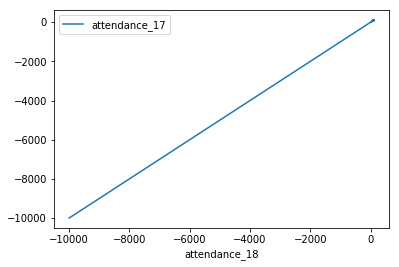

In [243]:
mcopy.plot(x='attendance_18', y='attendance_17')

In [217]:
for year in ['2016']:#,'2017', '2016', '2015']:
    vacant = pd.read_csv('/Users/j/Desktop/midterm/db/VacantBuildings' + year + '.csv')
    vacant_count_list = []

    for index, row in master.iterrows():
        print(index)
        vacant_count = 0
        for coord in list(vacant['Location']):
            building_coord = eval(coord)
            school_coord = eval(row['coord'])
            if (geodesic(building_coord, school_coord).miles) < 0.1:
                vacant_count += 1
        vacant_count_list.append(vacant_count)
                
    master['vacant_' + year[2:]] = vacant_count_list

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [211]:
mcopy = master

In [212]:
import numpy as np

In [219]:
master

,school,id,coord,address,type,attendance_18,attendance_17,attendance_16,attendance_15,attendance_14,vacant_18,vacant_16
0,Steuart Hill Academic Academy Elementary,4,"39.2868134, -76.6426704","30 S Gilmor St, Baltimore, MD 21223",Elementary,92.3,89.1,97.5,91.3,97.5,26,15
1,Cecil Elementary Elementary,7,"39.3131835, -76.6063402","2000 Cecil Ave, Baltimore, MD 21218",Elementary,93.5,97.5,97.5,94.9,94.1,62,25
2,City Springs Elementary Elementary,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",Elementary,91.5,93.2,93.7,92.8,92.7,6,5
3,City Springs Elementary Middle,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",Middle,91.9,92.3,94.9,94.1,97.5,6,5
4,City Springs Elementary All Students,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",All Students,91.7,NaN,NaN,NaN,NaN,6,5
5,James McHenry Elementary Elementary,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",Elementary,88.9,87.1,87.0,90.5,89.8,17,16
6,James McHenry Elementary Middle,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",Middle,91.1,89.0,86.8,88.0,87.1,17,16
7,James McHenry Elementary All Students,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",All Students,89.7,NaN,NaN,NaN,NaN,17,16
8,Eutaw-Marshburn Elementary Elementary,11,"39.3060840, -76.6301701","1624 Eutaw Pl, Baltimore, MD 21217",Elementary,92.8,97.5,90.7,91.5,90.4,5,2
9,Lakeland Elementary/Middle Elementary,12,"39.2536603, -76.6446964","2921 Stranden Rd, Baltimore, MD 21230",Elementary,94.6,94.4,97.5,94.1,94.8,2,2


In [225]:
import requests 

In [236]:
import urllib.request

fp = urllib.request.urlopen("https://zipwho.com/?zip=02038&city=&filters=--_--_--_--&state=&mode=zip")
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

HTTPError: HTTP Error 403: Forbidden

In [226]:

URL = "https://zipwho.com/?zip=02038&city=&filters=--_--_--_--&state=&mode=zip"
r = requests.get(url = URL) 



In [228]:
data = r.json

In [229]:
data

<bound method Response.json of <Response [200]>>

In [224]:
elem

<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="6a62e873-4fbc-fe42-b590-ce3cf52a12a6", element="289194e6-a4a7-d746-8387-061a6acbe736")>

In [ ]:
zipcodes = []
for addr in master['address']:
    zipcode.append(addr.split('MD ')[1])

In [ ]:
"https://zipwho.com/?zip=02038&city=&filters=--_--_--_--&state=&mode=zip"

"<td class="split">71,174</td>"

In [214]:
x1 = np.asarray(mcopy['attendance_18'])
x2 = np.asarray(mcopy['vacant_18'])

In [215]:
np.corrcoef(x1, x2)

array([[1.        , 0.02512769],
       [0.02512769, 1.        ]])

In [206]:
eval(master['coord'][0])

(39.2868134, -76.6426704)

In [185]:
attendRaw = pd.read_csv('/Users/j/Desktop/midterm/db/Attendance2018.csv')
coord = pd.read_excel('/Users/j/Desktop/midterm/db/coordinates.xls')
    
attendRaw = pd.merge(attendRaw, coord, how='left',left_on=['School Name'], right_on=['School Name'])

master = create_attendance_df(attendRaw, '18')


In [203]:
master['coord'][0]

'39.2868134, -76.6426704'

In [121]:
m = pd.merge(master,attendance,on='id', how='left')

In [123]:
attendance

,id,attendance_17
0,0301,97.5
1,0401,93.9
2,0402,93.5
3,0405,92.3
4,0406,93.5
5,0502,97.5
6,0504,93.7
7,0601,92.4
8,0603,97.5
9,0701,94.9


In [122]:
m

,school,id,type,attendance_18,attendance_17
0,Steuart Hill Academic Academy,4,Elementary,92.3,NaN
1,Cecil Elementary,7,Elementary,93.5,NaN
2,City Springs Elementary,8,Elementary,91.5,NaN
3,City Springs Elementary,8,Middle,91.9,NaN
4,City Springs Elementary,8,All Students,91.7,NaN
5,James McHenry Elementary,10,Elementary,88.9,NaN
6,James McHenry Elementary,10,Middle,91.1,NaN
7,James McHenry Elementary,10,All Students,89.7,NaN
8,Eutaw-Marshburn Elementary,11,Elementary,92.8,NaN
9,Lakeland Elementary/Middle,12,Elementary,94.6,NaN


In [115]:
master.merge(attendance, left_on='id')

TypeError: object of type 'NoneType' has no len()

In [109]:
attendance

,id,attendance_17
0,0301,97.5
1,0401,93.9
2,0402,93.5
3,0405,92.3
4,0406,93.5
5,0502,97.5
6,0504,93.7
7,0601,92.4
8,0603,97.5
9,0701,94.9


In [241]:
master.to_excel("Output_master.xls")

In [96]:
attendance2018 = create_attendance_df(attend2018, '18')

In [87]:
attendance2018 = attendance2018['id', 'attendance']

KeyError: ('id', 'attendance')

In [251]:
analysis = pd.read_excel("/Users/j/Desktop/midterm/Output_master.xls")

In [252]:
analysis

,Column 1,Column 2
Column 1,1.000000,NaN
Column 2,0.024253,1.0


In [248]:
analysis[.to_numpy()

,school,id,coord,address,type,attendance_18,attendance_17,attendance_16,attendance_15,attendance_14,vacant_18,vacant_16
0,Steuart Hill Academic Academy Elementary,4,"39.2868134, -76.6426704","30 S Gilmor St, Baltimore, MD 21223",Elementary,92.3,89.1,97.5,91.3,97.5,26,15
1,Cecil Elementary Elementary,7,"39.3131835, -76.6063402","2000 Cecil Ave, Baltimore, MD 21218",Elementary,93.5,97.5,97.5,94.9,94.1,62,25
2,City Springs Elementary Elementary,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",Elementary,91.5,93.2,93.7,92.8,92.7,6,5
3,City Springs Elementary Middle,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",Middle,91.9,92.3,94.9,94.1,97.5,6,5
4,City Springs Elementary All Students,8,"39.2898428, -76.5974931","100 S Caroline St, Baltimore, MD 21231",All Students,91.7,NaN,NaN,NaN,NaN,6,5
5,James McHenry Elementary Elementary,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",Elementary,88.9,87.1,87.0,90.5,89.8,17,16
6,James McHenry Elementary Middle,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",Middle,91.1,89.0,86.8,88.0,87.1,17,16
7,James McHenry Elementary All Students,10,"39.2874608, -76.6330853","31 S Schroeder St, Baltimore, MD 21223",All Students,89.7,NaN,NaN,NaN,NaN,17,16
8,Eutaw-Marshburn Elementary Elementary,11,"39.3060840, -76.6301701","1624 Eutaw Pl, Baltimore, MD 21217",Elementary,92.8,97.5,90.7,91.5,90.4,5,2
9,Lakeland Elementary/Middle Elementary,12,"39.2536603, -76.6446964","2921 Stranden Rd, Baltimore, MD 21230",Elementary,94.6,94.4,97.5,94.1,94.8,2,2


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
>>> # y = 1 * x_0 + 2 * x_1 + 3
>>> y = np.dot(X, np.array([1, 2])) + 3
>>> reg = LinearRegression().fit(X, y)
>>> reg.score(X, y)

In [9]:
school_uniques = list(set(attendance2018['school']))

In [10]:
pd.DataFrame(columns=['school', 'type', 'coordinates'])

,school,type,coordinates


In [35]:
school_uniques

['The Mount Washington School',
 'Matthew A. Henson Elementary',
 'Calverton',
 'KIPP Academy',
 'Charles Carroll Barrister Elementary',
 'Tench Tilghman Elementary',
 'Northwood Elementary',
 'Rognel Heights Elementary/Middle',
 'Guilford Elementary/Middle',
 'Arlington Elementary/Middle',
 'Sinclair Lane Elementary',
 'Carver Vocational-Technical High',
 'Grove Park Elementary',
 'Yorkwood Elementary',
 'New Song Academy',
 'Green Street Academy',
 'Gwynns Falls Elementary',
 'Highlandtown Elementary #237',
 'Mergenthaler Vocational-Technical High',
 'Johnston Square Elementary',
 'K.A.S.A. (Knowledge And Success Academy)',
 'Callaway Elementary',
 'City Neighbors High School',
 'Digital Harbor High School',
 'Cross Country Elementary',
 'Joseph C. Briscoe Academy',
 'Harlem Park Elementary',
 'Furley Elementary',
 'James Mosher Elementary',
 'William Paca Elementary',
 'Hazelwood Elementary/Middle',
 'Hampstead Hill Academy',
 'Roland Park Elementary/Middle',
 'Francis Scott Key Ele

In [21]:
schoolList = attendance2018['school']

In [12]:
COUNTER = 0
address_list = []
coord_list = []

In [13]:

def get_next_coords():
    address_list = []
    coord_list = []
    geolocator = Nominatim(user_agent="billy", timeout=10)
    for index, school in enumerate(reversed(school_uniques[0:2])):
        passed = False
        while not passed:
            try:
                time.sleep(3)
                location = geolocator.geocode(school + " Baltimore City")
                time.sleep(1)
                address_list.append(location.address)
                coord_list.append((location.latitude, location.longitude))
                print(index)
                time.sleep(5)
                passed = True

            except:
                print(index, school, "Error")
                

    

In [23]:
address_list = []
coord_list = []

In [22]:
schoolList[0:10]

0    Steuart Hill Academic Academy
1                 Cecil Elementary
2          City Springs Elementary
3          City Springs Elementary
4          City Springs Elementary
5         James McHenry Elementary
6         James McHenry Elementary
7         James McHenry Elementary
8       Eutaw-Marshburn Elementary
9       Lakeland Elementary/Middle
Name: school, dtype: object

In [41]:

geolocator = Nominatim(user_agent="worry", timeout=10)
location = geolocator.geocode("Boston")
#print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

address_list.append(location.address)
coord_list.append((location.latitude, location.longitude))

(42.3602534, -71.0582912)
{'place_id': 254479013, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2315704, 'boundingbox': ['42.2279112', '42.3969775', '-71.1912491', '-70.8044881'], 'lat': '42.3602534', 'lon': '-71.0582912', 'display_name': 'Boston, Suffolk County, Massachusetts, United States of America', 'class': 'place', 'type': 'city', 'importance': 0.83997821709893, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_place_city.p.20.png'}


In [32]:
df = pd.DataFrame(school_uniques)
df.to_excel('output.xlsx')

In [56]:

newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh))

866.4554329098687 km


In [17]:
def create_mcap_df(df):


    school_list = []
    proficient_list = []
    perc_lvl345_list = []
    perc_lvl12_list = []

    current_school = ''
    current_subject = ''
    num_school_cols = 1
    sum_proficient = 0
    sum_12 = 0


    for index, row in df.iterrows():
        if index == len(df) - 1:
            num_school_cols += 1
            sum_proficient += handle(row['Proficient Pct'])
            school_list.append(row['School Name'])
            sum_12 = sum_12 + handle(row['Level 1 Pct']) + handle(row['Level 2 Pct'] )
            proficient_list.append(sum_proficient / (num_school_cols * 100))
            perc_lvl12_list.append(sum_12 / (num_school_cols * 100))
            perc_lvl345_list.append(1 - (sum_12 / (num_school_cols * 100)))
            
            
        elif row['School Name'] != current_school:
            if current_school == '':
                current_school = row['School Name']
                sum_proficient += handle(row['Proficient Pct'])
                sum_12 = sum_12 + handle(row['Level 1 Pct']) + handle(row['Level 2 Pct'] )
                
            else:
                school_list.append(current_school)

                proficient_list.append(sum_proficient / (num_school_cols * 100))
                perc_lvl12_list.append(sum_12 / (num_school_cols * 100))
                perc_lvl345_list.append(1 - (sum_12 / (num_school_cols * 100)))

                current_school = row['School Name']
                num_school_cols = 1
                sum_proficient = 0
                sum_12 = 0

        else:
            num_school_cols += 1
            sum_proficient += handle(row['Proficient Pct'])
            sum_12 = sum_12 + handle(row['Level 1 Pct']) + handle(row['Level 2 Pct'] )

            """
            if current_subject not in row['Assessment']:
                if 'English' in current_subject:
                    pelvl12 = sum_subject / (sum_subject * 100)
                    pelvl345 = 1 - (sum_subject / (sum_subject * 100))
                elif any(subj in row['Assessment'] for subj in ['Math', 'Algebra']):
                    pmlvl12 = sum_subject / (sum_subject * 100)
                    pmlvl345 = 1 - (sum_subject / (sum_subject * 100))
                else:
                    print("Error: ", row['Assessment'])

            else:
            """
            
    cols = ['school', 'proficient', 'perc_lvl345', 'perc_lvl12', ]
    
    df_final = pd.DataFrame()
    df_final['school'] = school_list
    df_final['proficient'] = proficient_list
    df_final['perc_lvl345'] = perc_lvl345_list
    df_final['perc_lvl12'] = perc_lvl12_list
    
    return df_final



        
    